<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [4]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [5]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [6]:
os.getcwd()

'/content'

In [7]:
os.chdir('/content/drive/MyDrive')

In [8]:
product = pd.read_csv('product_data.csv')

In [9]:
reviews = pd.read_csv('reviews.csv')

In [10]:
product.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [11]:
product.shape

(720, 10)

In [12]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


In [13]:
reviews.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [14]:
product.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [15]:
product.drop(['url','image','reviewUrl'], inplace=True, axis=1)

In [16]:
product.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [17]:
product.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B07WJJFKYW,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [18]:
reviews.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

There are a total of 10 unique products in the dataset.<br>
The top brand and most reviewed is Samsung.<br>
The rating ranges from 1 to 5.<br>
The price value ranges from 1 to 1000 dollars.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

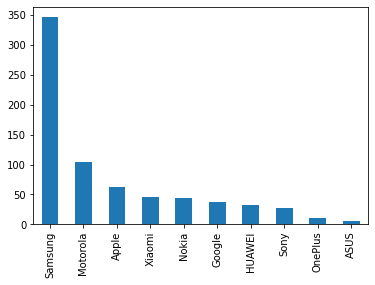

In [38]:
product['brand'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

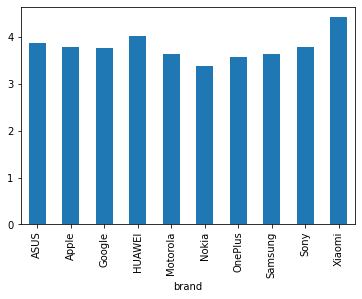

In [39]:
product.groupby('brand').mean()['rating'].plot(kind='bar')

### 4.6 Display average price per brand

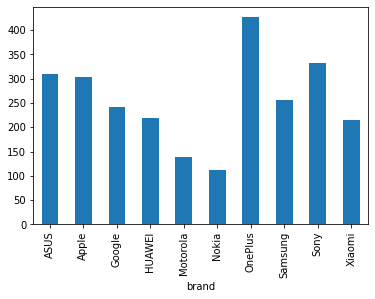

In [40]:
product.groupby('brand').mean()['price'].plot(kind='bar')

### 4.7 Display average 'totalReviews' per brand

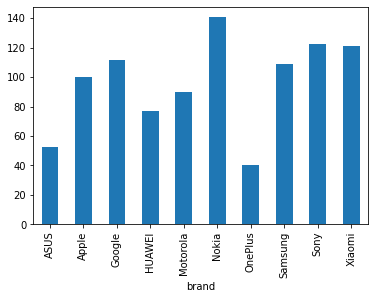

In [41]:
product.groupby('brand').mean()['totalReviews'].plot(kind='bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [42]:
df = pd.merge(reviews, product, how='inner', on='asin')

In [43]:
df.shape

(67986, 14)

In [44]:
df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'rating_y', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [45]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)

In [46]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [47]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [48]:
df2 = df[df['verified']==True]

In [49]:
df2.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

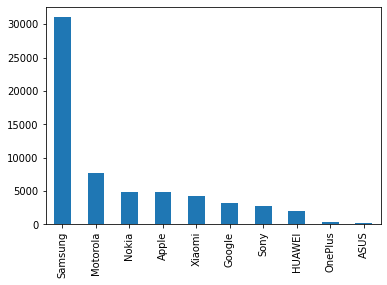

In [50]:
df2['brand'].value_counts().plot(kind='bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [51]:
df2 = df2[['brand', 'body', 'user_rating', 'review_title']]

In [52]:
df2.columns

Index(['brand', 'body', 'user_rating', 'review_title'], dtype='object')

In [53]:
df2.head()

,brand,body,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

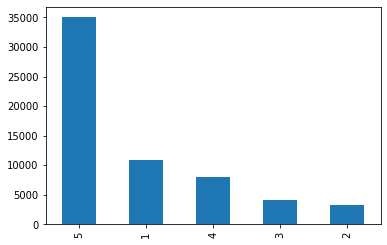

In [54]:
df2['user_rating'].value_counts().plot(kind='bar')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [55]:
df2['sentiment'] = df2['user_rating'].apply(lambda x:1 if x>3 else(0 if x==3 else(-1)))

In [56]:
df2['sentiment'].value_counts()

 1    42939
-1    14158
 0     4128
Name: sentiment, dtype: int64

In [57]:
df2.sample(5)

,brand,body,user_rating,review_title,sentiment
18804,Samsung,great,5,Five Stars,1
6978,Samsung,love te s4 just bought it for a friend cause s...,5,love te s4 just bought it for a friend cause ...,1
38103,Sony,Bought this for my wife who is very fickle abo...,5,"Great cameras, fast phone, nice buy!",1
11868,Samsung,"The phone was clean and nice, took great pictu...",4,After month review,1
26658,Google,"Loved the phone, but I ordered a used one (whi...",3,Bad battery in used phone,0


### 4.15 Check frequency distribution of the 'sentiment'

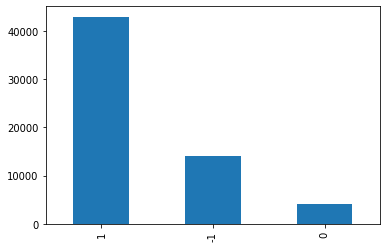

In [58]:
df2['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [59]:
pd.crosstab(df2['sentiment'],df2['brand']).T

sentiment,-1,0,1
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [60]:
df2['body'].dtype

dtype('O')

In [61]:
df2['body'] = df2['body'].astype('str').apply(lambda x: x.lower())

In [62]:
df2['body'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: body, dtype: object

In [63]:
df2.sample(2)

,brand,body,user_rating,review_title,sentiment
17213,Samsung,"i was not sure about this edge stuff, but now ...",4,good quality and functions well,1
55922,Samsung,i used to have a samsung s9+ and since ththath...,4,It lags more than I'm used to,1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [64]:
df2['body'] = df2['body'].replace('[^\w\s]','',regex=True)

In [65]:
df2.sample(5)

,brand,body,user_rating,review_title,sentiment
47268,HUAWEI,good looking phone offers some nice features s...,3,No WiFi calling on T-Mobile,0
27431,Samsung,i received the phone by the guaranteed date no...,3,Unable to send picture text messages using AT&...,0
27175,Sony,my previous phone was a note 4 so after playin...,4,"Not Ideal, But Still Very Good",1
66657,Motorola,great price for an unlocked smartphone works w...,4,SHE LOVES IT,1
56935,Motorola,better than the most expensive iphone hands down,5,Best cell out there.,1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [66]:
import nltk

In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
from nltk.corpus import stopwords

In [69]:
stop = set(stopwords.words('english'))

In [70]:
type(stop)

set

In [71]:
df2['body'] = df2['body'].apply(lambda words: " ".join (word for word in words.split() if word not in stop))

In [72]:
df2['body'].head()

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: body, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [73]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [74]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [75]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [76]:
def lemmatize_text(text):
  out_text = [lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)]
  return out_text

In [77]:
df2['keywords'] = df2['body'].apply(lemmatize_text)

### 5.5 Write a function to check word frequency of the text

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tfidf_vec = TfidfVectorizer()

In [80]:
tfidf_trans = tfidf_vec.fit_transform(df2['body'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [81]:
y = df2['sentiment']

In [82]:
tfidf_trans = tfidf_vec.fit_transform(df2['body'])

### 5.9 Split the data into Train & Test Sets

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_trans,y)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier()

In [87]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 7. Write your conclusion

In the beginning, we expect that the relationship with total reviews and price is positive correlated. It means that when the price is higher total reviews are higher, but the results are the products price lower than 500 dollar have the most reviews except some outliers a product price approximately 800dollar has over than 750 review.

On the other hand, expecting that the relationship between price and rating have the negative correlation but, when the price is lower, the rating of that product is increase with some exceptional cases on the other hand we expect that vice a versa.

We can say that Samsung has the highest rankings with highest prices and Xiaomi has the highest rankings with lowest price.

For the other variables like helpful votes, brand, total reviews are not significantly affect on price and total votes.

Moreover, in the sentiment analysis, there are no huge differences amongst brands and ratings. The most common words are similar for each brand and negative and positive words have the similar proportion for each brands and rating.